# PRJNA1110039 - Matra et al.

Article (preprint) link: https://www.researchsquare.com/article/rs-4609404/v1

In [2]:
suppressPackageStartupMessages({
    library(provoc)
    library(here)
    library(ggplot2)
    library(lubridate)
})


In [3]:
coco <- read.csv(
    here("data", "processed", 
        "PRJNA1110039_processed.csv.gz")
)
coco$mutation <- parse_mutations(coco$label)
head(coco)


,position,label,mutation,frequency,coverage,count,sra,date,sample_name,avg_spot_len,bases,bioproject,location,lat,lon,city,ww_population,zone
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<lgl>,<chr>
1,1001,+1002.A,ins:1002:1,0,776,0,SRR28985989,2022-07-25,IP15276,71,76194491,PRJNA1110039,PMC,18.5258,73.8612,Pune,NA,Pune Zone
2,10046,+10047.T,ins:10047:1,0,31,0,SRR28985989,2022-07-25,IP15276,71,76194491,PRJNA1110039,PMC,18.5258,73.8612,Pune,NA,Pune Zone
3,10059,+10060.T,ins:10060:1,0,27,0,SRR28985989,2022-07-25,IP15276,71,76194491,PRJNA1110039,PMC,18.5258,73.8612,Pune,NA,Pune Zone
4,10065,+10066.A,ins:10066:1,0,33,0,SRR28985989,2022-07-25,IP15276,71,76194491,PRJNA1110039,PMC,18.5258,73.8612,Pune,NA,Pune Zone
5,10232,+10233.A,ins:10233:1,0,430,0,SRR28985989,2022-07-25,IP15276,71,76194491,PRJNA1110039,PMC,18.5258,73.8612,Pune,NA,Pune Zone
6,1026,+1027.T,ins:1027:1,0,876,0,SRR28985989,2022-07-25,IP15276,71,76194491,PRJNA1110039,PMC,18.5258,73.8612,Pune,NA,Pune Zone


In [5]:
lineages_in_paper <- c("XBB.1.16", "BQ", "B.1.1.529", "BA.1", "BA.2", "BA.3", "BA.4", "BA.5", "BA.2.10", "XBB.2.3", "XBB")
barcodes <- provoc::usher_barcodes()
available_lineages <- intersect(lineages_in_paper, rownames(barcodes))
barcodes <- filter_lineages(barcodes, available_lineages)
rownames(barcodes)


[1] "XBB.1.16"  "XBB.2.3"   "XBB"       "BA.4"      "BA.2.10"   "BA.2"     
 [7] "BA.5"      "BA.3"      "BA.1"      "B.1.1.529"

In [6]:
system.time(
    res <- provoc(count / coverage ~ .,
        data = coco,
        lineage_defs = barcodes,
        by = "sra")
)
head(res)


   user  system elapsed 
326.292  37.009 382.653 

,rho,ci_low,ci_high,lineage,sra,date,sample_name,avg_spot_len,bases,bioproject,location,lat,lon,city,ww_population,zone
,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<lgl>,<chr>
1,2.773230e-05,NA,NA,XBB.1.16,SRR28985989,2022-07-25,IP15276,71,76194491,PRJNA1110039,PMC,18.5258,73.8612,Pune,NA,Pune Zone
2,4.533659e-05,NA,NA,XBB.2.3,SRR28985989,2022-07-25,IP15276,71,76194491,PRJNA1110039,PMC,18.5258,73.8612,Pune,NA,Pune Zone
3,9.906168e-02,NA,NA,XBB,SRR28985989,2022-07-25,IP15276,71,76194491,PRJNA1110039,PMC,18.5258,73.8612,Pune,NA,Pune Zone
4,6.523338e-04,NA,NA,BA.4,SRR28985989,2022-07-25,IP15276,71,76194491,PRJNA1110039,PMC,18.5258,73.8612,Pune,NA,Pune Zone
5,9.230127e-03,NA,NA,BA.2.10,SRR28985989,2022-07-25,IP15276,71,76194491,PRJNA1110039,PMC,18.5258,73.8612,Pune,NA,Pune Zone
6,3.817542e-01,NA,NA,BA.2,SRR28985989,2022-07-25,IP15276,71,76194491,PRJNA1110039,PMC,18.5258,73.8612,Pune,NA,Pune Zone


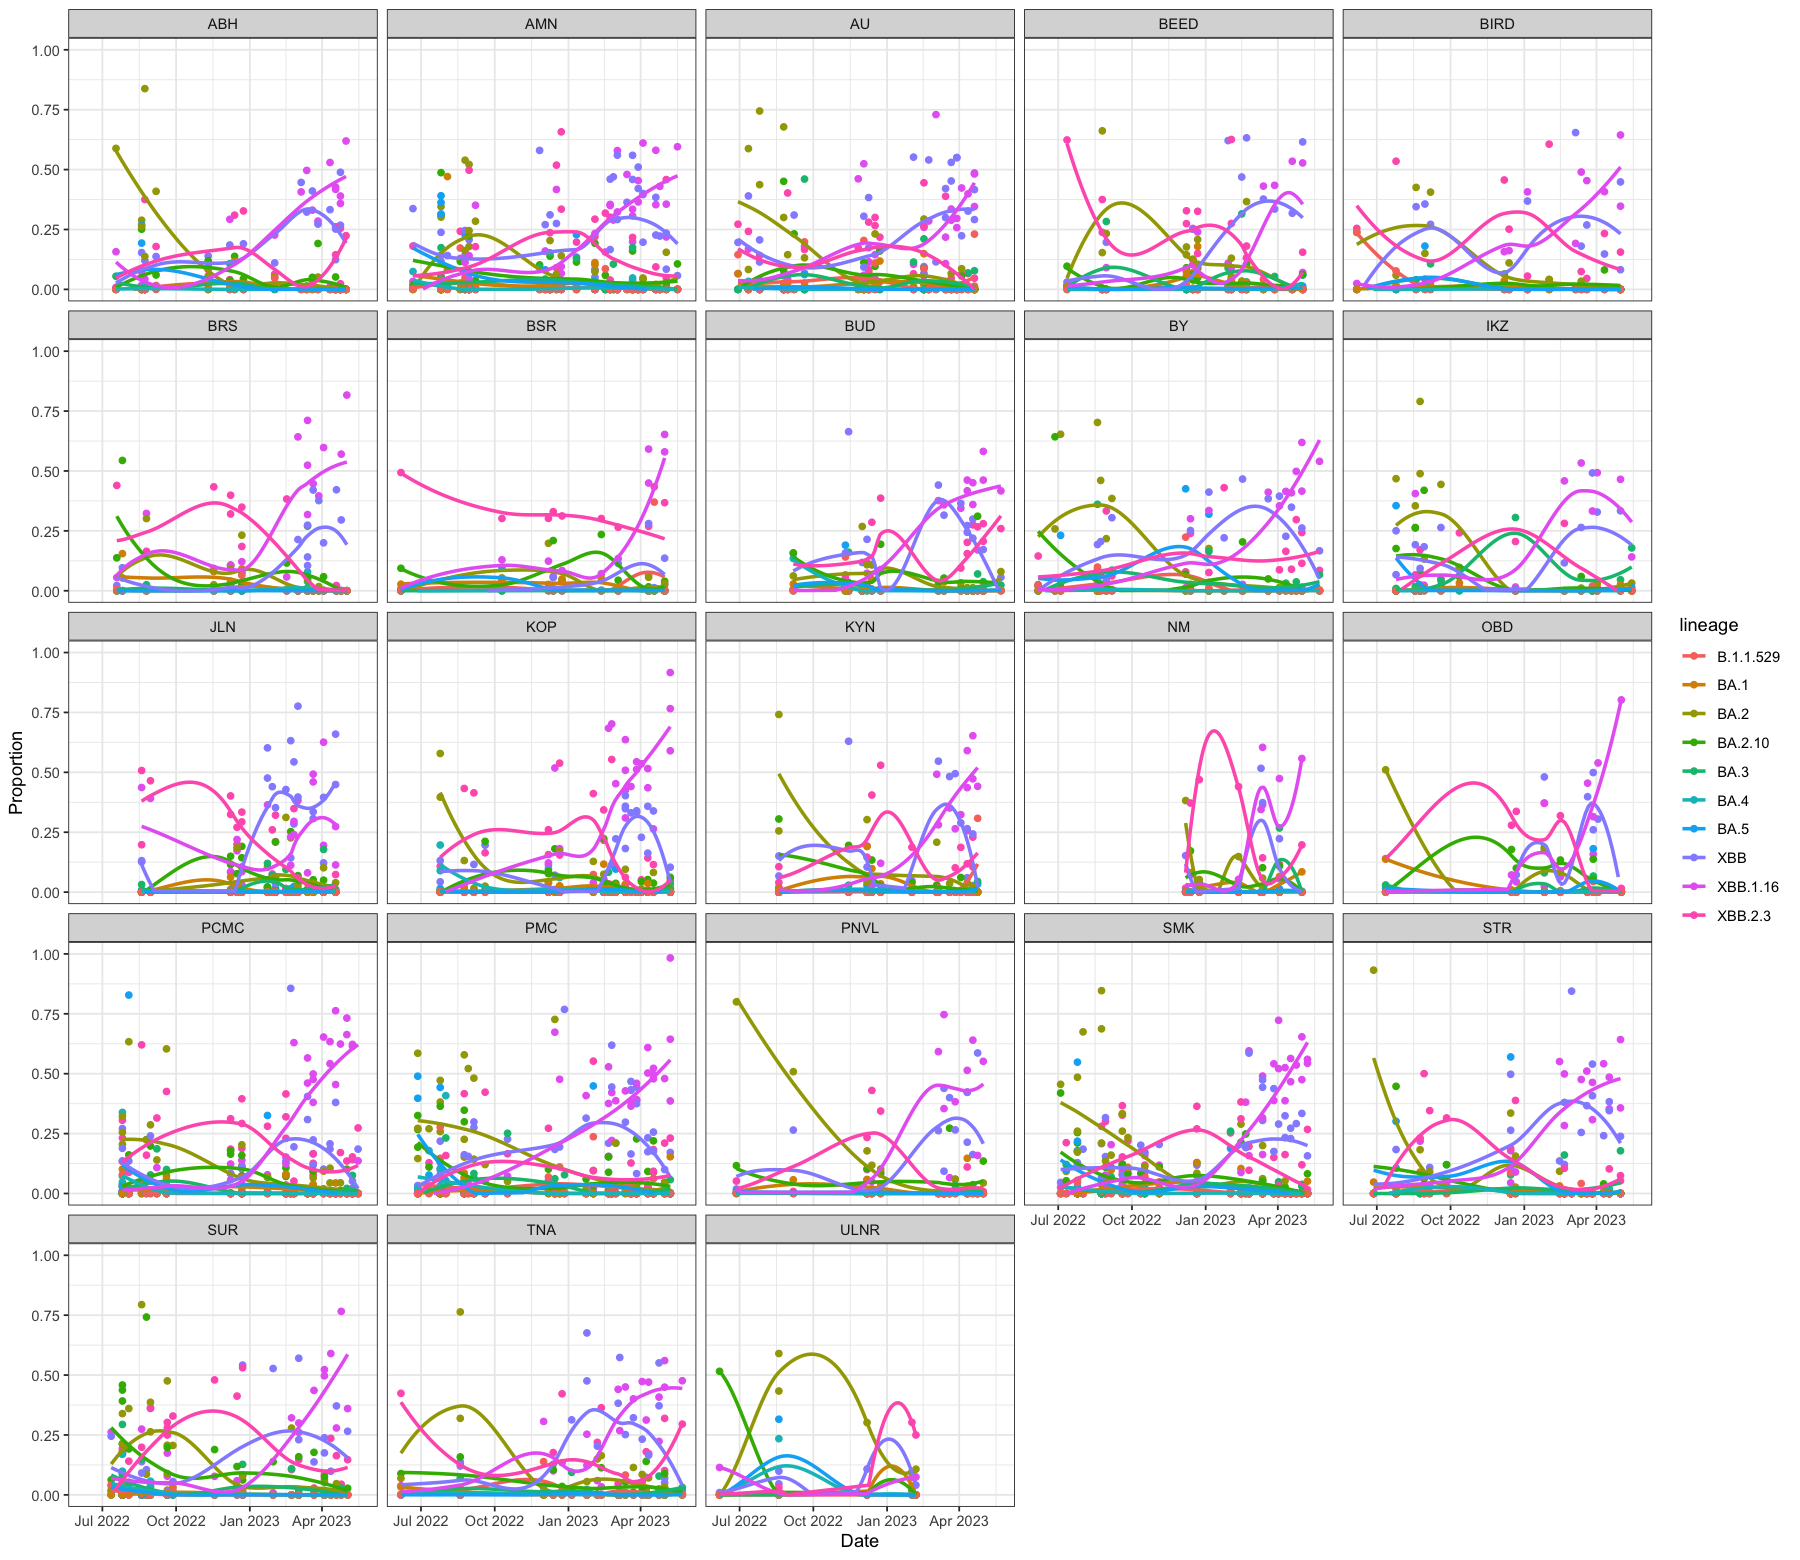

In [8]:
options(repr.plot.width = 15, repr.plot.height = 13)

res$date <- lubridate::ymd(res$date)

gg <- autoplot(res, date_col = "date") +
    facet_wrap(~location) +
    geom_smooth(formula = y ~ x, se = FALSE, method = "loess") +
    theme_bw()
suppressWarnings(print(gg))
